# Graphs
----

In [97]:
# Import Libraries
import pandas as pd
import json
import requests
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

# Global Overview
How have global temperature trends evolved throughout our date range? <br>

#### Analysis: On average, global temperatures have shown a great increase over time, as displayed in the graph below (ranging from 1850 to 1950).
"Ocean currents act as conveyer belts of warm and cold water, sending heat toward the polar regions and helping tropical areas cool off. The world's ocean is crucial to heating the planet. While land areas and the atmosphere absorb some sunlight, the majority of the sun's radiation is absorbed by the ocean." <br>
 -- Ocean Explorer (https://www.coastal.ca.gov/coastalvoices/resources/NOAAOceanExplorerClimate.pdf)
<br>
- Water has a higher specific heat capacity than land (ie. requires more energy for its temperature to change)
- Water can be distributed more evenly in the ocean since the body of water is so vast (larger volume as compared to land, much much greater), thus resulting in slower temperature changes in the ocean as compared to land
- Water absorbs more incoming solar radiation => higher ocean temperatures
- Oceans contribute to higher humidity levels in the atmosphere. Humidity traps heat, which them contributed to higher overall temperature of the Earth's atmosphere
- Land has lower thermal intertia, meaning it warm up quickly and cools down quickly
- Ocean has higher thermal inertia, meaning it takes time to warm up and cool down. Even though the sun is not out, it will still release stored heat, which then helps moderate temperature changes in the atmosphere

In [2]:
# Read CSV File
global_df = pd.read_csv("Cleaned Data/Global.csv")
temp_global_df = global_df[global_df['Year']<=1900]
global_df

,Year,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1850,7.900667,13.476667,1.964333,14.867167
1,1851,8.178583,13.081000,2.203917,14.991833
2,1852,8.100167,13.397333,2.337000,15.006500
3,1853,8.041833,13.886583,1.892500,14.955167
4,1854,8.210500,13.977417,1.762167,14.991000
...,...,...,...,...,...
161,2011,9.516000,15.284833,3.827667,15.769500
162,2012,9.507333,15.332833,3.756167,15.802333
163,2013,9.606500,15.373833,3.911333,15.854417
164,2014,9.570667,15.313583,3.877750,15.913000


In [3]:
temp = temp_global_df['LandAverageTemperature'].max()
temp

8.829749999999999

In [4]:
# Find the spike in temperature (seen a few years after 1875 tick in chart below)
filtered_df = temp_global_df[temp_global_df['LandAverageTemperature'] == temp]
filtered_df

,Year,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
28,1878,8.82975,14.742167,2.981667,15.357417


In [5]:
# Graph average global land temperature data
global_x = global_df['Year']
global_y = global_df['LandAverageTemperature']

fig1 = px.line(x=global_x, y=global_y, labels={'x': 'Year', 'y': 'Temperature (°C)'}, title='Average Global Land Temperature (1850-2015)')

# Show the plot
fig1.show()

El Nino 1877/78 - explanation for spike in global temperature graph

In [6]:
# Graph global minimum and maximum temperature data
global_max_y = global_df['LandMaxTemperature']
global_min_y = global_df['LandMinTemperature']

fig2 = px.line(x=global_x, y=[global_max_y, global_min_y], title='Global Land Temperature (Max and Min)', color_discrete_map={0: 'blue', 1: 'green'})

# Update Axis Titles
fig2.update_xaxes(title_text='Year')
fig2.update_yaxes(title_text='Temperature (°C)')
fig2.data[0].name = 'Max Temperature'
fig2.data[1].name = 'Min Temperature'

# Show the plot
fig2.show()

In [7]:
# Graph temperature data
global_landocean_y = global_df['LandAndOceanAverageTemperature']
global_land_y = global_df['LandAverageTemperature']

fig3 = px.line(x=global_x, y=[global_landocean_y, global_land_y], title='Global Land and Ocean Average Temperature', color_discrete_map={0: 'blue', 1: 'green'})

# Update Axis Titles
fig3.update_xaxes(title_text='Year')
fig3.update_yaxes(title_text='Temperature (°C)')
fig3.data[0].name = 'Land & Ocean Avg Temp'
fig3.data[1].name = 'Land Avg Temp'

# Show the plot
fig3.show()

# Country-specific Trends
Identify if any particular continents are experiencing more rapid temperature increases than others. <br>
How have temperature trends evolved throughout our date range in South Africa, India, Germany, United States, Brazil, and Australia<s>, and Antarctica</s>?

In [8]:
# Read CSV File
countries_df = pd.read_csv("Cleaned Data/Countries.csv")
countries_df.head()

,Unnamed: 0,Country,Year,Yearly Average Temperature
0,32691,Afghanistan,1950,13.043500
1,32692,Africa,1950,23.880833
2,32693,Albania,1950,13.812833
3,32694,Algeria,1950,22.781833
4,32695,American Samoa,1950,26.520083


In [9]:
# Filter data for selected countries
south_africa_df = countries_df[countries_df['Country'].isin(['South Africa'])]
india_df = countries_df[countries_df['Country'].isin(['India'])]
germany_df = countries_df[countries_df['Country'].isin(['Germany'])]
united_states_df = countries_df[countries_df['Country'].isin(['United States'])]
brazil_df = countries_df[countries_df['Country'].isin(['Brazil'])]
australia_df = countries_df[countries_df['Country'].isin(['Australia'])]

# Get x and y values to plot
countries_x = south_africa_df['Year']
south_africa_y = south_africa_df['Yearly Average Temperature']
india_y = india_df['Yearly Average Temperature']
germany_y = germany_df['Yearly Average Temperature']
united_states_y = united_states_df['Yearly Average Temperature']
brazil_y = brazil_df['Yearly Average Temperature']
australia_y = australia_df['Yearly Average Temperature']

In [10]:

# Plot temperature trends for each country
fig4 = px.line(x=countries_x, y=[south_africa_y, india_y, germany_y, united_states_y, brazil_y, australia_y], title='Temperature Trends in Selected Countries')

# Update Axis Titles
fig4.update_xaxes(title_text='Year')
fig4.update_yaxes(title_text='Yearly Average Temperature (°C)')
fig4.data[0].name = 'South Africa'
fig4.data[1].name = 'India'
fig4.data[2].name = 'Germany'
fig4.data[3].name = 'United States'
fig4.data[4].name = 'Brazil'
fig4.data[5].name = 'Australia'

# Show the plot
fig4.show()

# Hotspots and Cooling
Which countries/regions are experiencing the most rapid increase in temperature, and are there any regions experiencing a decrease? <br>
Antarctica is a continent, but is relevant + extremely important to our analysis -> we look at its data <br>

In [30]:
# Read CSV File
states_df = pd.read_csv("Cleaned Data/States.csv")
states_df.head()

,State,Country,Year,Yearly Average Temperature
0,Acre,Brazil,1950,25.753667
1,Adygey,Russia,1950,9.967750
2,Aga Buryat,Russia,1950,-1.543167
3,Alabama,United States,1950,17.393417
4,Alagoas,Brazil,1950,24.559833


In [31]:
# Get years (unique)
year_list = states_df['Year'].unique()
print(year_list) # our x-values to graph

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013]


In [49]:
# Get countries (unique)
countries_list = states_df['Country'].unique()
print(countries_list)

['Brazil' 'Russia' 'United States' 'Canada' 'India' 'China' 'Australia']


In [111]:
# Find percent change between each year ((final-initial)/initial)x100%

# make list of years (ie. Change in yearly average temperature from 1950-1951, 1951-1952, ...)
# year_list total 64 values, years list total 63 values
years = [] 
for i in range(len(year_list)-1):
    label = str(year_list[i]) + ' - ' + str(year_list[i+1])
    years.append(label)
years

# make empty df for specified countries of interest
percent_change_df = pd.DataFrame({'Year Range': years})
for i in range(7):
    # get data for country at index i
    country = countries_list[i]
    data = countries_df[countries_df['Country']==country]
    data = data.reset_index(drop=True)

    # loop to find percent change (iterates for length of the data minus 1, ie. range(len(data))-1)
    temp = []
    for j in range(len(data)-1):
        final = data['Yearly Average Temperature'][j+1]
        initial = data['Yearly Average Temperature'][j]
        val = (final - initial)/initial
        val = val*100
        temp.append(val)
    # append new calculated data to a dataframe
    percent_change_df['% Change in Yearly Avg Temp for ' + country] = temp

percent_change_df['Years'] = year_list[1:64]

# Data frame holds the percent change in yearly average temperature for the specified country/region
percent_change_df

,Year Range,% Change in Yearly Avg Temp for Brazil,% Change in Yearly Avg Temp for Russia,% Change in Yearly Avg Temp for United States,% Change in Yearly Avg Temp for Canada,% Change in Yearly Avg Temp for India,% Change in Yearly Avg Temp for China,% Change in Yearly Avg Temp for Australia,Years
0,1950 - 1951,0.642613,-9.859301,-2.770584,-9.402954,2.372566,3.438151,1.097802,1951
1,1951 - 1952,0.219110,22.139078,6.687195,-26.116382,0.597974,-3.327510,-0.324721,1952
2,1952 - 1953,0.579103,-22.603673,6.136256,-0.677597,0.804758,5.743434,-0.057787,1953
3,1953 - 1954,-0.114354,11.254860,-1.257378,19.418007,-1.605828,-9.275170,0.391548,1954
4,1954 - 1955,-0.807065,5.817452,-9.493744,4.630250,-0.889637,5.190185,0.020487,1955
...,...,...,...,...,...,...,...,...,...
58,2008 - 2009,0.748711,39.422665,2.074160,-3.728925,3.034773,3.217208,2.090652,2009
59,2009 - 2010,0.827455,-1.907707,4.033016,-54.343927,-0.381098,-3.343150,-2.698990,2010
60,2010 - 2011,-1.485719,-24.753443,0.466393,88.413154,-2.535844,-2.534748,-1.409386,2011
61,2011 - 2012,1.133224,14.703937,7.446836,-10.689938,0.922567,-3.805856,1.182983,2012


In [122]:
# Draw the lie plot (fill area for easier visualization)
fig5 = px.line()
fig5_x = percent_change_df['Years']
fig5_y_Brazil = percent_change_df['% Change in Yearly Avg Temp for Brazil']
fig5_y_Russia = percent_change_df['% Change in Yearly Avg Temp for Russia']
fig5_y_United_States = percent_change_df['% Change in Yearly Avg Temp for United States']
fig5_y_Canada = percent_change_df['% Change in Yearly Avg Temp for Canada']
fig5_y_India = percent_change_df['% Change in Yearly Avg Temp for India']
fig5_y_China = percent_change_df['% Change in Yearly Avg Temp for China']
fig5_y_Australia = percent_change_df['% Change in Yearly Avg Temp for Australia']


# Add filled areas for Area 1 and Area 2
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_Brazil, fill='tozeroy', name='Brazil'))
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_Russia, fill='tozeroy', name='Russia'))
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_United_States, fill='tozeroy', name='United States'))
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_Canada, fill='tozeroy', name='Canada'))
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_India, fill='tozeroy', name='India'))
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_China, fill='tozeroy', name='China'))
fig5.add_trace(go.Scatter(x=fig5_x, y=fig5_y_Australia, fill='tozeroy', name='Australia'))

# Add a horizontal line at y=0
fig5.add_hline(y=0, line=dict(color='black', width=0.5, dash='dash'))

# Update layout with axis labels and title
fig5.update_layout(xaxis_title='Year', yaxis_title='Change in Temperature (%)', title='Percent Change in Yearly Average Temperature')

# Show the plot
fig5.show()

# Graph is interactive: click, hold and drag the box to zom in and get a closer view of the graph!

Each drastic change shows a shift in the specified country's temperature, such that positive values indicate an increase in yearly average temperature and negative values indicate a decrease in yearly average temperature. <br> <br>
An example is the peek for Canada in 1982, which was when Canada had a tropical cyclone sweep in, causing a great rise in temperatures and a subtropical storm. (https://www.ec.gc.ca/ouragans-hurricanes/default.asp?lang=en&n=98CAD67D-1) The two negative peeks we see the few years after is the result of Canada's atmospheric temperature "readjusting" itself after the drastic change. <br> <br>
The surrounding ocean aids in readjusting atmospheric (land and ocean) temperatures to regulate changes and maintain a sort of homeostasis.

# Population & Air Pollution

In [92]:
# Read CSV fie
countries_df = pd.read_csv("Cleaned Data/Countries.csv")
countries_df.head()

,Country,Year,Yearly Average Temperature
0,Afghanistan,1950,13.043500
1,Africa,1950,23.880833
2,Albania,1950,13.812833
3,Algeria,1950,22.781833
4,American Samoa,1950,26.520083


In [94]:
selected_countries = ['South Africa', 'India', 'Germany', 'United States', 'Brazil', 'Australia']

# Filter the DataFrame
selected_countries_df = countries_df[(countries_df['Country'].isin(selected_countries)) & (countries_df['Year'] >= 1973)]

# Display the filtered DataFrame
selected_countries_df.tail()

,Country,Year,Yearly Average Temperature
15276,Brazil,2013,25.348125
15330,Germany,2013,9.235250
15348,India,2013,25.413250
15447,South Africa,2013,17.325375
15477,United States,2013,11.297111


In [95]:
# Read the "population" CSV file
population_df = pd.read_csv('Cleaned Data/Clean_population.csv')

population_df.tail()

,Country,Year,Population
295,South Africa,2022,59893885
296,India,2022,1417173173
297,Germany,2022,83797985
298,Brazil,2022,215313498
299,Australia,2022,26005540


           Country  Year  Yearly Average Temperature  Population
0        Australia  1973                   22.412750    13380000
1           Brazil  1973                   25.169583   103666904
2          Germany  1973                    8.402833    78936666
3            India  1973                   24.386583   596107483
4     South Africa  1973                   17.584417    24382513
..             ...   ...                         ...         ...
241         Brazil  2013                   25.348125   201721767
242        Germany  2013                    9.235250    80645605
243          India  2013                   25.413250  1291132063
244   South Africa  2013                   17.325375    53873616
245  United States  2013                   11.297111   316059947

[246 rows x 4 columns]


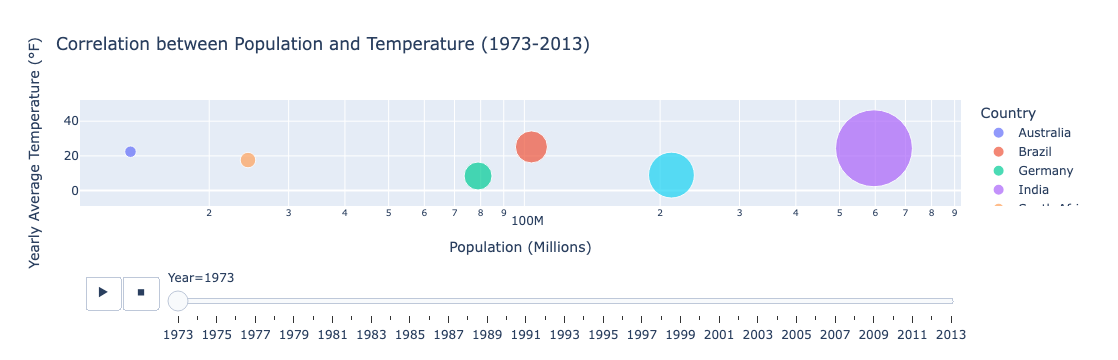

In [17]:
# Assuming you have the necessary dataframes and variables defined

# Merge dataframes on 'Year' and 'Country'
merged_df = pd.merge(selected_countries_df, population_df, on=['Year', 'Country'])

merged_df.head()

# Create Animated Bubble Chart
fig = px.scatter(merged_df, x='Population', y='Yearly Average Temperature', color='Country',
                 size='Population',
                 title='Correlation between Population and Temperature (1973-2013)',
                 labels={'Population': 'Population (millions)', 'Yearly Average Temperature': 'Temperature (°F)'},
                 hover_data=['Year', 'Country'],
                 animation_frame='Year',  # Specify the animation frame
                 animation_group='Country',
                 size_max=80,
                 log_x=True)  # Specify the animation group

correlation_coefficient = merged_df['Population'].corr(merged_df['Yearly Average Temperature'])
print(merged_df)

# print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
# # Calculate and add correlation annotations
# print(merged_df.groupby(['Country', 'Year']).corr()['Population'])
# correlations = merged_df.groupby(['Country', 'Year']).corr()['Population']['Yearly Average Temperature'].unstack()
#     for year in merged_df['Year'].unique():
#         correlation = correlations.loc[country, year]
#         fig.add_annotation(
#             x=merged_df[(merged_df['Country'] == country) & (merged_df['Year'] == year)]['Population'].iloc[0],
#             y=merged_df[(merged_df['Country'] == country) & (merged_df['Year'] == year)]['Yearly Average Temperature'].iloc[0],
#             text=f'{country} {year}: {correlation:.2f}',
#             showarrow=False,
#             xshift=5,
#             yshift=5
#         )

fig.update_layout (xaxis_title='Population (Millions)', yaxis_title='Yearly Average Temperature (°F)')

# (xaxis=dict(tickvals=[10, 100, 1000, 2000], ticktext=['10M', '100M', '1B', '2B'], dtick=1),
#                   yaxis=dict(tickvals=[10, 15, 20, 25, 30], ticktext=['10°F', '15°F', '20°F', '25°F', '30°F']),

fig.show()
